# Joining Yelp Data to Original Dataset, Expensive Restaurants

#### Import dependencies

In [120]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#### Read in CSVs

In [121]:
csv1 = pd.read_csv('joinable_kc_dataset.csv')
csv2 = pd.read_csv('yelp_restaurants.csv')

In [122]:
joinable_raw_data = pd.DataFrame(csv1)
restaurants = pd.DataFrame(csv2)

#### View the datasets

In [123]:
joinable_raw_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,lat_group,long_group,lat+long_group
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,...,1955,0,98178,47.5112,-122.257,1340,5650,47.516708,-122.253,"47.51670803571437,-122.2529999999999"
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,...,1951,1991,98125,47.7210,-122.319,1690,7639,47.716540,-122.309,"47.71654017857156,-122.3089999999999"
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,...,1933,0,98028,47.7379,-122.233,2720,8062,47.738744,-122.225,"47.73874375000014,-122.2249999999999"
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,...,1965,0,98136,47.5208,-122.393,1360,5000,47.516708,-122.393,"47.51670803571437,-122.393"
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,...,1987,0,98074,47.6168,-122.045,1800,7503,47.616624,-122.057,"47.61662410714297,-122.0569999999999"


In [124]:
restaurants.head()

,lat+long_group,Number of Expensive Restaurants
0,"47.51670803571437,-122.2529999999999",0
1,"47.71654017857156,-122.3089999999999",0
2,"47.73874375000014,-122.2249999999999",0
3,"47.51670803571437,-122.393",1
4,"47.61662410714297,-122.0569999999999",0


#### Join datasets

In [125]:
df = pd.merge(joinable_raw_data, restaurants, on='lat+long_group')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,lat_group,long_group,lat+long_group,Number of Expensive Restaurants
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,...,0,98178,47.5112,-122.257,1340,5650,47.516708,-122.253,"47.51670803571437,-122.2529999999999",0
1,1895000260,20140721T000000,207950,2,2.00,890,5000,1.0,0,0,...,0,98118,47.5158,-122.264,1860,5000,47.516708,-122.253,"47.51670803571437,-122.2529999999999",0
2,1895000045,20150504T000000,195000,2,1.00,820,5100,1.0,0,0,...,0,98118,47.5156,-122.262,1170,5304,47.516708,-122.253,"47.51670803571437,-122.2529999999999",0
3,770000045,20141024T000000,405600,5,1.50,2830,4000,2.5,0,0,...,0,98118,47.5132,-122.262,1480,4000,47.516708,-122.253,"47.51670803571437,-122.2529999999999",0
4,8073000550,20150415T000000,1700000,4,3.75,3190,17186,2.0,1,4,...,0,98178,47.5115,-122.246,2290,13496,47.516708,-122.253,"47.51670803571437,-122.2529999999999",0


#### Drop rows with no data

In [126]:
len(df)

21436

In [127]:
df2 = df.dropna()

In [128]:
len(df2)

21436

In [129]:
pd.Series(df2['price']/df2['sqft_living']).mean()

263.9937748988584

#### Plot

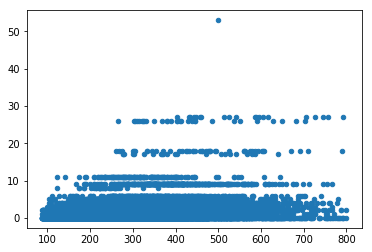

In [130]:
#plt.figure(figsize=(20,10))
plt.scatter(df2['price']/df2['sqft_living'], df2['Number of Expensive Restaurants'], s=20)
#plt.xlim(0,1250000)
plt.show()

In [131]:
df3 = df2[df2['Number of Expensive Restaurants'] >= 3]
df4 = df2[df2['Number of Expensive Restaurants'] < 3]

In [132]:
print(df3['price'].mean())
print(df3['price'].std())
print(len(df3))

699993.9136442142
453634.6854069897
3474


In [133]:
print(df4['price'].mean())
print(df4['price'].std())
print(len(df4))

509800.0742678989
340437.4537964234
17962


#### Linear Regression

In [152]:
fig, ax = plt.subplots()
fit = np.polyfit((pd.Series(df2['price']/df2['sqft_living'])), df2['Number of Expensive Restaurants'], deg=1)
ax.plot(pd.Series(df2['price']/df2['sqft_living']), fit[0] * pd.Series(df2['price']/df2['sqft_living']) + fit[1], color='red')
ax.scatter((pd.Series(df2['price']/df2['sqft_living'])), df2['Number of Expensive Restaurants'], s=1)
plt.xlim(0, 1000)
plt.ylim(0, 60)
plt.title('Price Per SQFT vs. # of Expensive Restaurants')
plt.xlabel('Price Per SQFT')
plt.ylabel('Number of Expensive Restaurants')



Text(0,0.5,'Number of Expensive Restaurants')

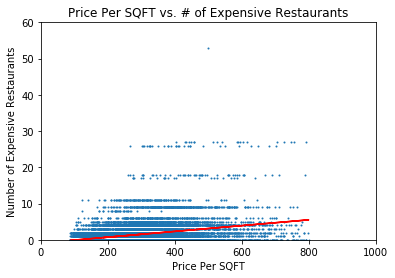

In [153]:
plt.show()

In [151]:
df2[(df2['Number of Expensive Restaurants'] >= 25) & (df2['price']/df2['sqft_living'] <= 275)].head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,lat_group,long_group,lat+long_group,Number of Expensive Restaurants
16427,682000030,20140703T000000,610000,3,2.0,2300,13418,1.0,0,0,...,0,98004,47.6075,-122.2,2140,9380,47.605522,-122.197,"47.60552232142868,-122.1969999999999",26


In [136]:
df2['price']/df2['sqft_living']

0        188.050847
1        233.651685
2        237.804878
3        143.321555
4        532.915361
5        174.369748
6        170.212766
7        285.185185
8        603.448276
9        161.931818
10       148.648649
11       236.185383
12       156.250000
13       267.889908
14       177.118644
15       144.954128
16       259.615385
17       207.983193
18       218.750000
19       405.961538
20       187.460938
21       287.323944
22       252.808989
23       251.818182
24       207.812500
25       187.931034
26       235.955056
27       347.761194
28       217.391304
29       130.341880
            ...    
21406    273.484848
21407    225.848564
21408    339.694656
21409    217.812500
21410    165.467626
21411    147.861607
21412    181.055156
21413    171.539594
21414    189.939117
21415    162.056738
21416    140.796211
21417    173.765234
21418    167.224080
21419    242.187500
21420    250.000000
21421    265.605096
21422    243.176667
21423    226.930000
21424    231.284916


#### Pearson's Correlation

In [137]:
pd.Series(df2['price']/df2['sqft_living']).corr(df2['Number of Expensive Restaurants'])

0.34823872488080393

Correlation is weak

In [141]:
x = np.arange(1,21437,1)
x

array([    1,     2,     3, ..., 21434, 21435, 21436])

In [142]:
corrs = []
for a in x:
    b = df2['price'].head(a).corr(df2['Number of Expensive Restaurants'].head(a))
    corrs.append(b)
    

/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:3159: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:3093: RuntimeWarning: divide by zero encountered in double_scalars
  c *= 1. / np.float64(fact)


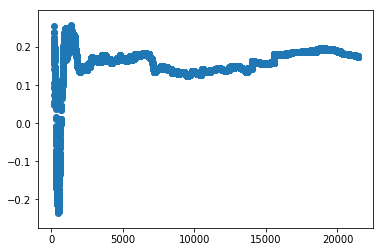

In [143]:
plt.scatter(x,corrs)
#plt.xlim(0,2000)
plt.show()